In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

In [16]:
#inport data
trainDF = pd.read_csv("train.csv")
testDF = pd.read_csv("test.csv")

In [17]:
trainDF.head(5)
#Show dataset feactures

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
testDF.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
trainDF.isna().sum() #checking if the data has NULL values
#data['AGE'] = data['AGE'].fillna(data['AGE'].mean())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
testDF.isna().sum() #checking if the data has nan value

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
#since cabin is almost pure Null values I will drop the column
del trainDF['Cabin']
del testDF['Cabin']

In [22]:
trainDF['Age'] = trainDF['Age'].fillna(trainDF['Age'].mean()) #remove nan values whit a average of the values
testDF['Age'] = testDF['Age'].fillna(testDF['Age'].mean())

In [23]:
#drop columns that are not good for generalizing
del trainDF['PassengerId']
#del testDF['PassengerId']
del trainDF['Name']
del testDF['Name']
del trainDF['Ticket']
del testDF['Ticket']

In [24]:
trainDF.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:
testDF.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [26]:
trainDF.isna().sum() 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [27]:
testDF.isna().sum() 

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [28]:
trainDF["Embarked"].value_counts() 
# Check the distint values

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
trainDF['Embarked'] = trainDF['Embarked'].fillna("S") 
# Fill the Nan vaules with S becuase is more probable
testDF['Fare'] = testDF['Fare'].fillna(testDF['Fare'].mean())
# Fill the Nan vaules with the average


In [30]:
testDF.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
5,897,3,male,14.0,0,0,9.2250,S
6,898,3,female,30.0,0,0,7.6292,Q
7,899,2,male,26.0,1,1,29.0000,S
8,900,3,female,18.0,0,0,7.2292,C
9,901,3,male,21.0,2,0,24.1500,S


In [31]:
# transform categorical values(text) to numerical values
# male = 1, female = 0
# S = 2,  C = 0,   Q = 1
label = preprocessing.LabelEncoder()
sex = label.fit_transform(trainDF['Sex'])
trainDF['Sex'] = label.fit_transform(trainDF['Sex'])

embarked = label.fit_transform(trainDF['Embarked'])
trainDF['Embarked'] = label.fit_transform(trainDF['Embarked'])

sexTest = label.fit_transform(testDF['Sex'])
testDF['Sex'] = label.fit_transform(testDF['Sex'])

embarkedTest = label.fit_transform(testDF['Embarked'])
testDF['Embarked'] = label.fit_transform(testDF['Embarked'])

testDF.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2
5,897,3,1,14.0,0,0,9.2250,2
6,898,3,0,30.0,0,0,7.6292,1
7,899,2,1,26.0,1,1,29.0000,2
8,900,3,0,18.0,0,0,7.2292,0
9,901,3,1,21.0,2,0,24.1500,2


In [32]:
trainDF.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
5,0,3,1,29.699118,0,0,8.4583,1
6,0,1,1,54.000000,0,0,51.8625,2
7,0,3,1,2.000000,3,1,21.0750,2
8,1,3,0,27.000000,0,2,11.1333,2
9,1,2,0,14.000000,1,0,30.0708,0


In [33]:
#split dataset
dataset = np.array(trainDF)

x = dataset[:, 1:8]  #x is the rest of the feactures
y = dataset[:, 0]   #y is the survived variable
test_size = 0.2
xTrain, xTest, yTrain, yTest = train_test_split(x, y,test_size = test_size)

In [34]:
# set neural network with the MLP classifier class 
MLP = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=15000)
MLP.fit(xTrain, yTrain) #Train Model

MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=15000)

In [35]:
predict = MLP.predict(xTest) #Prediction whit MLP
CM = confusion_matrix(yTest,predict)

In [36]:
print(accuracy_score(yTest, predict)) 

0.8156424581005587


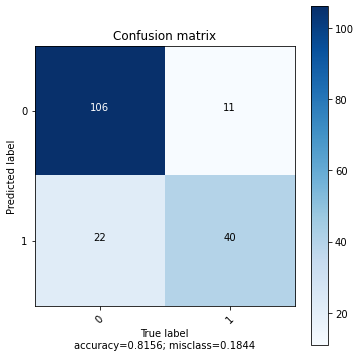

In [37]:
#Print the confusion matrix
def plot_confusion_matrix(values, classes):
    import itertools
    m, n = values.shape

    accuracy = np.trace(values) / float(np.sum(values))
    misclass = 1 - accuracy

    plt.figure(figsize=(5, 5))
    plt.imshow(values, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()

    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=45)
    plt.yticks(marks, classes)

    thresh = values.max() / 2
    for i, j in itertools.product(range(m), range(n)):
        plt.text(j, i, "{:,}".format(values[i, j]),
                 horizontalalignment="center",
                 color="white" if values[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
#Testing the function

plot_confusion_matrix(values = CM, classes = ['0', '1'])

In [38]:
#comparing neural networks vs SVM  vs KNN (cloustering algoritms) to see which does a better job
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
svc = SVC()
svc.fit(xTrain, yTrain)
predictSvm = svc.predict(xTest)
print(svc.score(xTrain, yTrain))

0.672752808988764


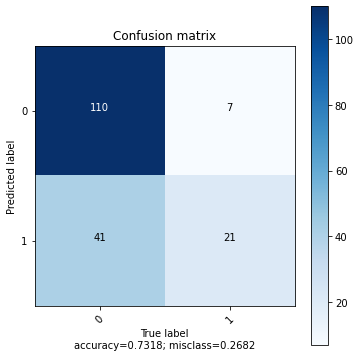

In [39]:
predict = svc.predict(xTest)
CM1 = confusion_matrix(yTest,predict)
plot_confusion_matrix(values = CM1, classes = ['0', '1'])

In [40]:
#Tain KNN
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(xTrain, yTrain)
predictKnn = knn.predict(xTest)
print(knn.score(xTrain, yTrain))

0.8300561797752809


In [41]:
#Predict KNN
predict = knn.predict(xTest)
CM2 = confusion_matrix(yTest,predict)
print(CM2)
#plot_confusion_matrix(values = CM2, classes = ['0', '1'])

[[105  12]
 [ 40  22]]


In [42]:
#Add PassengerId
idPassenger = testDF['PassengerId']

In [43]:
#Test Neural Network
predictionNeuralNet = MLP.predict(testDF.drop('PassengerId', axis=1))
predNNOut = pd.DataFrame({ 'PassengerId' : idPassenger, 'Survived': predictionNeuralNet })
print(predNNOut.head())

   PassengerId  Survived
0          892       0.0
1          893       0.0
2          894       0.0
3          895       0.0
4          896       1.0


In [44]:
#Test SVM
predictionSVM = svc.predict(testDF.drop('PassengerId', axis=1))
predSVMOut = pd.DataFrame({ 'PassengerId' : idPassenger, 'Survived': predictionSVM })
print(predSVMOut.head())
# 896 have a error

   PassengerId  Survived
0          892       0.0
1          893       0.0
2          894       0.0
3          895       0.0
4          896       0.0


In [45]:
#Test KNN
predictionKNN = knn.predict(testDF.drop('PassengerId', axis=1))
predKNNOut = pd.DataFrame({ 'PassengerId' : idPassenger, 'Survived': predictionKNN })
print(predKNNOut.head())
# 894 and 896 have a error

   PassengerId  Survived
0          892       0.0
1          893       0.0
2          894       1.0
3          895       0.0
4          896       0.0
